# Ring Opening/Closing

A classic example of organic chemistry is a pericyclic reaction. Let us use the example of the electrocyclic reaction that interconverts butadiene and cyclobutene.

## Intrinsic Reaction Coordinate

The best way to follow this reaction is to start with the cyclobutene and stretch the breaking bond to estimate the structure of the transition state. Then we perform a ytransition state optimization to get the structure of the TS.

Now we can follow the path of the reaction downhill from the TS in both directions. This will allow more than just the single coordinate that was being driven in the PES scan to be followed as we return to product and will be a better representation of the overall reaction coordinate.

## Start with the Build

Cyclic structures do not work well with Z-matrices for describibg geometry. Forcing a frozen bond length change will necesitate changes in bends and torsions in adjacent atoms which may require bond length changes to accommodate these values which will require changes in bends and torsions in adjacent atoms, ad infinitum. Sometimes a Z-matrix works, but often it results in intractable computational problems.

It is better to use cartesian coordinates in these systems. But, how do we get a set of xyz coordnates for a molecule? We could look uop a set from databases on the web and cyclobutadiene is a small molecule and very likely to be represented in databases. I will start with a Z-matrix for butadiene and alter it to make the bond angles and lengths resemble cyclobutene and then allow the system to optimize without constraints

I used the Z-matrix from previous butadiene builds. Consider the code below and observe that I made the dihedral angle zero degrees. This is the s-cis conformer. I then changed the bend angle of the terminal carbon atons (A_321) to 90 degrees to make it square and bring the ends together. I changed the torsion angle of a terminal hydrogen (D2) to 90 degrees to get it out to the side of the structure.

In [21]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  2
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 90
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 90
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### Optimize the Initial Structure

The structure was visualized with the ```helpers.drawXYZ()``` function and it looked awful. But it should be close enough to optimize to the cyclobutadiene. Or it will explode (computationally) and either snap back to butadiene or really go wild and end in errors and tears. Let us see by running the code below.

In [22]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})

energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
#energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

internal_angle = mol.get_variable("A_321")

print(f"After optimization: {internal_angle:.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -153.0407687 Hartrees
After optimization: 94.711 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =   94.7108756517
    CC1       =    1.5255428575
    CC2       =    1.3143324162
    CH_512    =  115.7276952132
    CH_5_9    =    1.0887865783
    CH_615    =  109.0680120690
    CH_6_10   =    1.0887791461
    CH_721    =  131.0309310618
    CH_7_8    =    1.0817104790
    D1    

### Evaluate Optimized Structure

The visualized structure looks like butadiene. I printed out a file with the new Z-matrix and now see if I had set D2 to 120 degrees and D3 to -120 degrees I would have had a much better starting structure. But it worked so we now have a starting structure. We can evaluate att distances and bond angles by printing out a file and reading it back in like above. Does the information seem reasonable to you. Check the C-C distances. Do they fit with your expectations?

In [23]:
psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.526   
        Distance 1 to 3 2.094   
        Distance 1 to 4 1.565   
        Distance 1 to 5 1.089   
        Distance 1 to 6 1.089   
        Distance 1 to 7 2.380   
        Distance 1 to 8 3.175   
        Distance 1 to 9 2.250   
        Distance 1 to 10 2.250   
        Distance 2 to 3 1.314   
        Distance 2 to 4 2.094   
        Distance 2 to 5 2.226   
        Distance 2 to 6 2.226   
        Distance 2 to 7 1.082   
        Distance 2 to 8 2.210   
        Distance 2 to 9 2.866   
        Distance 2 to 10 2.866   
        Distance 3 to 4 1.526   
        Distance 3 to 5 2.866   
        Distance 3 to 6 2.866   
        Distance 3 to 7 2.210   
        Distance 3 to 8 1.082   
        Distance 3 to 9 2.226   
        Distance 3 to 10 2.226   
        Distance 4 to 5 2.250   
        Distance 4 to 6 2.250   
        Distance 4 to 7 3.175   
        Distance 4 to 8 2.380   
        Distance 4 to 9 1.089 

### Archiving the Starting Point

We can collect the text string that defines the cartesian coordinates and print it out. You can cut and paste the text into your next project that starts with cyclobutene and save yourself the steps above. Consider the text below.

In [24]:
xyz = mol.save_string_xyz()

### print thegeometry string in xyz coordinates
print(xyz)

### write that string to a file for future use
f = open("cyclobutene_xyz.txt", "w")
f.write(xyz)
f.close()

mol.get_full_point_group()

0 1
 C    0.782455511077    0.000056179286   -0.728171973158
 C    0.657166208122    0.000000000000    0.792217318237
 C   -0.657166208122    0.000000000000    0.792217318237
 C   -0.782455511077   -0.000056179286   -0.728171973158
 H    1.239028099676   -0.886700393349   -1.164818816058
 H    1.239072475728    0.886839852077   -1.164698827250
 H    1.412084253413   -0.000006834962    1.566940691590
 H   -1.412084253413    0.000006834962    1.566940691590
 H   -1.239028099676    0.886700393349   -1.164818816058
 H   -1.239072475728   -0.886839852077   -1.164698827250



'C2'

## Hunt the Transition State

To find the transition state we will try a PES scan where we constrain the C1-C4 distance from the bond distance to longer distances. Since we are now daling with cartesian coordinates and not a z-matrix with variables we will have to use the ```RANGED_DISTANCE``` global setting to establish a C1-C4 bond distance that is to be reached through optimization. Recall that we had set a torsion angle in the Z-matrix and then used ```FROZEN_DIHEDRAL``` to freeze that set value. Here we start with the initial bond distance and use ```RANGED_DISTANCE``` to set a new value that must be moved toward. Best to keep the steps small when using this method else we can end up with weird problems like atoms passing through each other during optimization. Consider the code below.

Optimizer: Optimization complete!
The optimized energy for this configuration is -155.8835963 Hartree



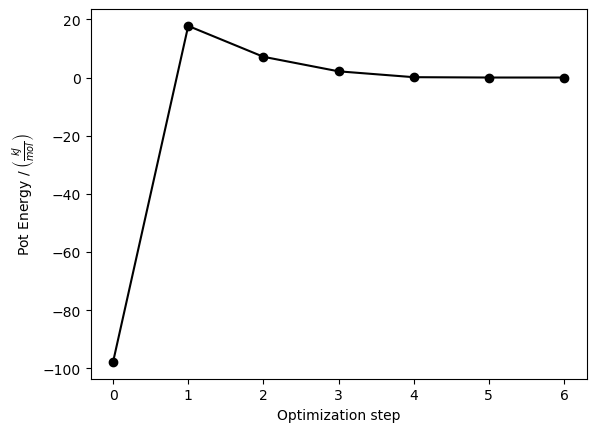

interactive(children=(IntSlider(value=0, description='conf', max=6), Output()), _dom_classes=('widget-interact…

In [25]:
### We start with the optimized molecule for the gauche conformer => mol2

mol2 = mol.clone()  # Copy it into a new molecule to preserve the geometry of the original.
                     # We will now proceed with mol2

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
#        "FULL_HESS_EVERY": 5,         # default => -1
#        "PRINT": 2,                   # default => 1
#        "GUESS": "sad",               # default => auto
#        "REFERENCE": "rhf",           # default => rhf
#        "SCF_TYPE": "direct",         # default => pk
#        "INTS_TOLERANCE": 1E-8,       # default => 1e-12. A value of 1e-8 is recommended when SCF_TYPE set to "direct"
        "G_CONVERGENCE": "QCHEM"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
    })

# We will not change the settings that were created above.
psi4.set_options({"FROZEN_DIHEDRAL":""})     # Clear FROZEN_DIHEDRAL


output_file = "cyclobutene1.out"
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)

goal = 2.0
psi4.set_options({"RANGED_DISTANCE":f"1 4 {goal-.01} {goal+.01}"})

#energy, hist = psi4.optimize("hf/STO-3G", molecule = mol2, return_history=True)
energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol2, return_history=True)




print(f"The optimized energy for this configuration is {energy:.7f} Hartree\n")

# a = np.array(hist["energy"])                 # print the energies at each step     
# b = ((a - a[-1]) * psi4.constants.hartree2kJmol) 
# for c in b: print(f"{c:10.3f}")

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

energies = np.array(hist["energy"])            # Get the list of energies from the history of the optimization
energies = (energies - energies[-1]) * psi4.constants.hartree2kJmol   # relative energy in kJ/mole

ax.plot(energies, "ko-")                       # Plot the energies at each step
ax.set_xlabel('Optimization step')
ax.set_ylabel(r'Pot Energy /$\;\left(\frac{kJ}{mol}\right)$')
plt.show()
    
coordinates = hist["coordinates"]              # Visualize the structures at each step
traj = hp.mol2traj(mol, coordinates)
hp.drawXYZGeomSlider(traj)

### Accepting Failure

Your calculation may have turned out differently but mine did not approach a structure expected of the transition state. The C1 and C4 atoms were pushed apart to 1.9 angstroms but there was no rotation of the end groups or apparent progression to $sp^2$ from $sp^3$. I believe that the math is trapped in the higher $C_{2v}$ symmetry of the initial cyclobutadiene structure. We need to give it a push to tilt it off the crest of an energy ridge where the gradient toward rotating the end groups is zero. Either side of that ridge and it would follow a path downhill to the expected structure. However the very top of that ridge is $C_{2v}$ and it just wont vibrate off that line.

The code below captures information and prints it for our review. We see that the C1-C4 distance is indeed what was set in the code above. 

In [26]:
psi4.set_output_file("temp.dat", append=False, print_header=False)
mol2.print_distances()
mol2.print_bond_angles()
mol2.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

        Interatomic Distances (Angstroms)

        Distance 1 to 2 1.508   
        Distance 1 to 3 2.222   
        Distance 1 to 4 1.990   
        Distance 1 to 5 1.092   
        Distance 1 to 6 1.092   
        Distance 1 to 7 2.340   
        Distance 1 to 8 3.304   
        Distance 1 to 9 2.605   
        Distance 1 to 10 2.605   
        Distance 2 to 3 1.338   
        Distance 2 to 4 2.222   
        Distance 2 to 5 2.242   
        Distance 2 to 6 2.242   
        Distance 2 to 7 1.091   
        Distance 2 to 8 2.201   
        Distance 2 to 9 2.965   
        Distance 2 to 10 2.965   
        Distance 3 to 4 1.508   
        Distance 3 to 5 2.965   
        Distance 3 to 6 2.965   
        Distance 3 to 7 2.201   
        Distance 3 to 8 1.091   
        Distance 3 to 9 2.242   
        Distance 3 to 10 2.242   
        Distance 4 to 5 2.605   
        Distance 4 to 6 2.605   
        Distance 4 to 7 3.304   
        Distance 4 to 8 2.340   
        Distance 4 to 9 1.092 

## Start Again with *s-cis* Butadiene

We will try again. this time we will start with the product of ring opening and move the terminal carbon groups closer together. First we will take the Z-matrix for *s-cis* Butadiene from previous work and oprtimize to the gauche stable conformer with a tirsion angle of about 30 degrees.

In [1]:
# use psi4conda environment
import psi4
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import helpers as hp # Many useful functions from https://lcbc-epfl.github.io/iesm-public/intro.html

psi4.core.clean_options()

output_file = "butadiene.log"

psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

# The Z-matrix as a text string ### From previous optimization
data = """
       0 1
    C1
    C2      1    CC1
    C3      2    CC2           1  A_321
    C4      3    CC1           2  A_321           1     dihedral
    H5      1    CH_5_9        2  CH_512          3     D3
    H6      1    CH_6_10       5  CH_615          2     D2
    H7      2    CH_7_8        1  CH_721          3     D1
    H8      3    CH_7_8        4  CH_721          2     D1
    H9      4    CH_5_9        3  CH_512          2     D3
    H10     4    CH_6_10       9  CH_615          3     D2

       symmetry c2
       dihedral  =  30
       CC1 = 1.3
       CC2 = 1.5
       CH_5_9 = 1.0
       CH_7_8 = 1.0
       CH_6_10 = 1.0
       A_321 = 120
       CH_512 = 120
       CH_615 = 120
       CH_721 = 120
       D1 = 180
       D2 = 180
       D3 = 180

       units angstrom
       """ 

# Create the Molecule object
mol = psi4.geometry(data)             # Create Molecule object from data string

#hp.drawXYZ(mol)
hp.drawXYZ_labeled(mol)



  Memory set to   1.863 GiB by Python driver.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# Optimize the structure
#psi4.set_options({"FROZEN_DIHEDRAL":"1 2 3 4"})
psi4.core.clean_options()

#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = mol, return_history=True)
energy_ts, hist = psi4.optimize("hf/6-31+G(d)", molecule = mol, return_history=True)
                                                                       
print(f"Initial energy is {energy_ts:0.7f} Hartrees")

print(f"321 angle: {mol.get_variable('A_321'):.3f} degrees\n") 
print(f"torsion: {mol.get_variable('dihedral'):.3f} degrees\n") 

hp.drawXYZ_labeled(mol)

psi4.set_output_file("temp.dat", append=False, print_header=False)
mol.print_in_input_format()
mol.print_distances()
mol.print_bond_angles()
mol.print_out()

!cat "temp.dat"     # cat is a terminal command that will print the contents of a file to stdout

Optimizer: Optimization complete!
Initial energy is -154.9211310 Hartrees
321 angle: 125.398 degrees

torsion: 39.953 degrees



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

    Molecular point group: c2
    Full point group: C2

    Geometry (in Angstrom), charge = 0, multiplicity = 1:

    C       
    C             1         CC1
    C             2         CC2      1       A_321
    C             3         CC1      2       A_321      1    dihedral
    H             1      CH_5_9      2      CH_512      3          D3
    H             1     CH_6_10      5      CH_615      2          D2
    H             2      CH_7_8      1      CH_721      3          D1
    H             3      CH_7_8      4      CH_721      2          D1
    H             4      CH_5_9      3      CH_512      2          D3
    H             4     CH_6_10      9      CH_615      3          D2

    A_321     =  125.3982794441
    CC1       =    1.3249000284
    CC2       =    1.4780238986
    CH_512    =  121.2061102788
    CH_5_9    =    1.0752711601
    CH_615    =  116.8825735177
    CH_6_10   =    1.0758882370
    CH_721    =  118.8896678434
    CH_7_8    =    1.0786224880
    D1    

/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!
The optimized energy for this configuration is -155.9048616 Hartree



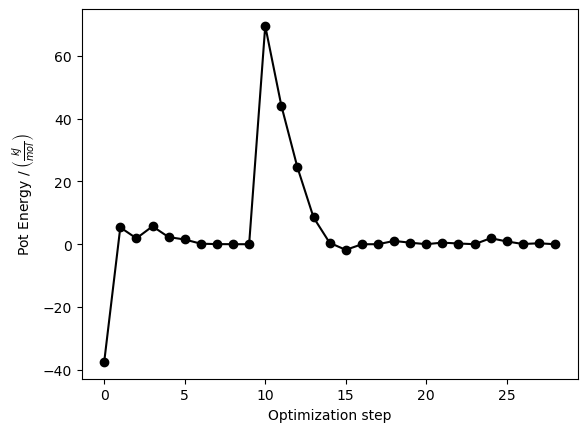

interactive(children=(IntSlider(value=0, description='conf', max=28), Output()), _dom_classes=('widget-interac…

In [5]:
### We start with the optimized molecule for the gauche conformer => mol2

mol2 = mol.clone()  # Copy it into a new molecule to preserve the geometry of the original.
                     # We will now proceed with mol2
psi4.core.clean_options()

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
#        "FULL_HESS_EVERY": 5,         # default => -1
#        "PRINT": 2,                   # default => 1
#        "GUESS": "sad",               # default => auto
#        "REFERENCE": "rhf",           # default => rhf
#        "SCF_TYPE": "direct",         # default => pk
#        "INTS_TOLERANCE": 1E-8,       # default => 1e-12. A value of 1e-8 is recommended when SCF_TYPE set to "direct"
        "G_CONVERGENCE": "QCHEM"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
    })

output_file = "cyclobutene1.out"
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)

goal = 2.5
psi4.set_options({"RANGED_DISTANCE":f"1 4 {goal-.01} {goal+.01}"})

#energy, hist = psi4.optimize("hf/STO-3G", molecule = mol2, return_history=True)
energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol2, return_history=True)




print(f"The optimized energy for this configuration is {energy:.7f} Hartree\n")

# a = np.array(hist["energy"])                 # print the energies at each step     
# b = ((a - a[-1]) * psi4.constants.hartree2kJmol) 
# for c in b: print(f"{c:10.3f}")

fig, ax =  plt.subplots(1)                     # Create a blank plot in a figure

energies = np.array(hist["energy"])            # Get the list of energies from the history of the optimization
energies = (energies - energies[-1]) * psi4.constants.hartree2kJmol   # relative energy in kJ/mole

ax.plot(energies, "ko-")                       # Plot the energies at each step
ax.set_xlabel('Optimization step')
ax.set_ylabel(r'Pot Energy /$\;\left(\frac{kJ}{mol}\right)$')
plt.show()
    
coordinates = hist["coordinates"]              # Visualize the structures at each step
traj = hp.mol2traj(mol, coordinates)
hp.drawXYZGeomSlider(traj)

In [15]:
output_file = "Butane_PES_1.out"
psi4.set_memory("4GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
        "MAXITER": 100,               # default => 50
        "GEOM_MAXITER": 100,          # default => 50
        "G_CONVERGENCE": "NWCHEM_LOOSE"  # default => QCHEM:  MOLPRO, GAU, GAU_LOOSE, GAU_TIGHT, INTERFRAG_TIGHT, GAU_VERYTIGHT, TURBOMOLE, CFOUR, NWCHEM_LOOSE
         })

mol3 = mol.clone()

step = 0.1; start = 1.5; end = 3.0
number_of_points = (end - start)/step + 1
range_of_values = np.linspace(end, start, int(number_of_points)) 
#range_of_values = [0,60,120,180] 
#range_of_values = [119,119.1,119.2,119.3,119.4,119.5,119.6,119.7,119.8,119.9,120,120.1] 


distance_list = []
energy_list = []
geometries = []
histories = []
for distance in range_of_values:
    psi4.set_options({"RANGED_DISTANCE":f"1 4 {distance-.01} {distance+.01}"})
    energy, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = mol3, return_history=True)
    distance_list.append(distance)
    energy_list.append(energy)
    geometries.append(mol3.clone())
    histories.append(hist)

print("Done")

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/si

Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!


/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:677: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[-1, :-1] = RFOmat[-1, :-1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:678: RuntimeWarning: invalid value encountered in scalar power
  SRFOmat[:-1, -1] = RFOmat[:-1, -1] / alpha**0.5
/Users/blink/psi4conda/lib/python3.11/site-packages/optking/stepAlgorithms.py:684: RuntimeWarning: invalid value encountered in scalar power
  scale_mat = np.diag(np.repeat(1 / alpha**0.5, dim1))


Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Optimizer: Optimization complete!
Done


    distance      energy     kJ/mole
0        3.0 -155.929915    0.000000
1        2.9 -155.928301    4.236014
2        2.8 -155.925203   12.370965
3        2.7 -155.920388   25.013780
4        2.6 -155.913645   42.716834
5        2.5 -155.904860   65.782018
6        2.4 -155.894060   94.135760
7        2.3 -155.881808  126.304905
8        2.2 -155.869488  158.651949
9        2.1 -155.870999  154.684180
10       2.0 -155.883596  121.610119
11       1.9 -155.896050   88.913236
12       1.8 -155.907566   58.677993
13       1.7 -155.915250   38.502310
14       1.6 -155.921871   21.119236
15       1.5 -155.920605   24.443510


<Axes: xlabel='distance', ylabel='kJ/mole'>

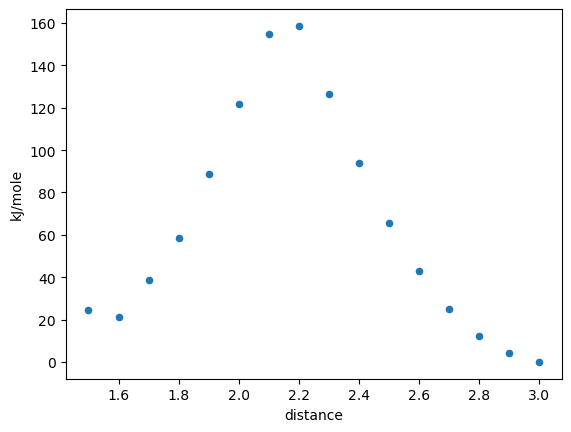

In [16]:
data_dictionary = {"distance": distance_list,
                   "energy": energy_list}

df = pd.DataFrame.from_dict(data_dictionary)

df["kJ/mole"] = df["energy"] - np.min(df["energy"])
df["kJ/mole"] = df["kJ/mole"] * psi4.constants.hartree2kJmol
print(df)

df.plot(x="distance", y = "kJ/mole", kind="scatter", )   # try kind="scatter" as well

In [18]:
energies = np.array(energy_list)
energies = energies - np.min(energies)
energies = energies * psi4.constants.hartree2kJmol


traj = [geom.save_string_xyz_file() for geom in geometries]
traj_arrays = [geom.to_arrays()[0] for geom in geometries]

hp.drawXYZGeomSlider(traj)

#hp.drawXYZGeomSliderMolecularProperty(traj, distance_list, energies, 'distance')
# for the slider to function properly you must have dihedral angles of exact integers. 
# If that is not the case, adjust the number of dihedrals to divide -180 to 180 degrees into even steps (including the zero value).
# Did not work.  Seems to have a bug in it.

interactive(children=(IntSlider(value=0, description='conf', max=15), Output()), _dom_classes=('widget-interac…

In [20]:
ts = geometries[8]

#hp.drawXYZ(ts)

In [ ]:
psi4.core.clean_options()

output_file = "butane_TS.log"
psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
#        "BASIS": "sto-3g",            # default => None - Basis set must be specified
#        "BASIS": "6-31+G(d)",         # I am sepcifying the basis set in the method string of the optimize function
#        "BASIS": "6-31++G(d,p)",      #  so I do not need to set the "BASIS" option here.
#        "BASIS": "6-311++G(d,p)",        
#        "BASIS": "cc-pvdz"
#        "SAVE_OPTIMIZATION": True,    # default => False
        "OPT_TYPE": "ts",              # default => "min":  MIN, TS, IRC
#        "MAXITER": 100,               # default => 50
#        "GEOM_MAXITER": 500,          # default => 50
        "FULL_HESS_EVERY": 0,         # default => -1 -> Does not do Hessian; 0 -> hessian at start
#        "PRINT": 2,                   # default => 1
#        "GUESS": "sad",               # default => "auto": AUTO, CORE, GWH, SAD, SADNO, SAP, SAPGAU, HUCKEL, MODHUCKEL, READ
#        "REFERENCE": "rhf",            # default => rhf: RHF, ROHF, UHF, CUHF, RKS, UKS
#        "SCF_TYPE": "direct",         # default => pk:  DIRECT, DF, PK, OUT_OF_CORE, PS, INDEPENDENT, GTFOCK, DFDIRJ+LINK, DFDIRJ+COSX
#        "SCF_TYPE": "df",             # default => pk
#        "INTS_TOLERANCE": 1E-8,       # default => 1e-12. A value of 1e-8 is recommended when SCF_TYPE set to "direct"
#        "PRINT_TRAJECTORY_XYZ_FILE":True,   # default => false
#        "PRINT_OPT_PARAMS": True,      # default => False
#        "WRITE_TRAJECTORY": True,      # default => False
        "NORMAL_MODES_WRITE": True,    # default => False
    })


#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = ts, return_history=True)          
energy_ts, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("b3lyp/6-311++G(d,p)", molecule = ts, return_history=True)   
#energy_ts, hist = psi4.optimize("B3LYP-d3bj2b/6-311++G(d,p)", molecule = ts, return_history=True)   


#print out TS in case something goes wrong
with open('ts.xyz', 'w') as f:
    f.write(ts.save_string_xyz_file())

In [22]:
print(f"TS energy is {energy_ts:0.7f} Hartrees")


hp.drawXYZ(ts)

TS energy is -155.8638815 Hartrees


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
ts2 = geometries[9]
#hp.drawXYZ(ts2)

psi4.core.clean_options()

output_file = "butane_TS2.log"
psi4.set_memory("2GB")
psi4.set_output_file(output_file, append=False, loglevel=20, print_header=True, inherit_loglevel=True, execute=True)
psi4.core.set_num_threads(4)

psi4.set_options({
        "OPT_TYPE": "ts",              # default => "min":  MIN, TS, IRC
        "FULL_HESS_EVERY": 0,         # default => -1 -> Does not do Hessian; 0 -> hessian at start
        "NORMAL_MODES_WRITE": True,    # default => False
    })


#energy_ts, hist = psi4.optimize("hf/sto-3g", molecule = ts2, return_history=True)          
energy_ts, hist = psi4.optimize("b3pw91/6-31+G(d)", molecule = ts2, return_history=True)   
#energy_ts, hist = psi4.optimize("b3lyp/6-311++G(d,p)", molecule = ts2, return_history=True)   
#energy_ts, hist = psi4.optimize("B3LYP-d3bj2b/6-311++G(d,p)", molecule = ts2, return_history=True)   


#print out TS in case something goes wrong
with open('ts2.xyz', 'w') as f:
    f.write(ts2.save_string_xyz_file())

In [29]:
print(f"TS energy is {energy_ts:0.7f} Hartrees")


hp.drawXYZ(ts2)

TS energy is -155.8638814 Hartrees


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [25]:
!ls -alr *.molden_normal_modes

-rw-r--r--  1 blink  staff  18963 22 May 22:18 butane_TS2.C4H6.16013.molden_normal_modes
-rw-r--r--  1 blink  staff  34528 15 May 15:57 butane_TS.default.29456.molden_normal_modes
-rw-r--r--  1 blink  staff  34528 14 May 22:34 butane_TS.default.1122.molden_normal_modes
-rw-r--r--  1 blink  staff  18963 22 May 22:01 butane_TS.C4H6.16013.molden_normal_modes


In [30]:

hp.show_normal_modes(filename='butane_TS2.C4H6.16013.molden_normal_modes')

interactive(children=(Dropdown(description='Normal mode:', options=((-731.922483422, 0), (472.5947686261, 1), …